In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("C:\\Users\\HP\\Desktop\\New folder\\bbc-text.csv")
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
data.columns

Index(['category', 'text'], dtype='object')

In [32]:
y=data['category']
x=data['text']
y.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

<BarContainer object of 5 artists>

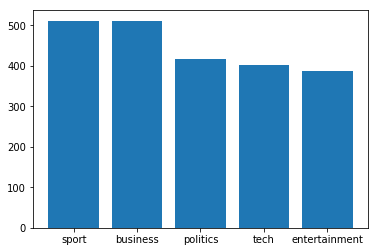

In [33]:
# Frequency of target variables
labels=('sport','business','politics','tech','entertainment')
lavels=(511,510,417,401,386)
plt.bar(labels,lavels)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [7]:
x_train.shape

(1557,)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
from sklearn.feature_selection import SelectPercentile

In [12]:
vectorizer=TfidfVectorizer()
x_train_transformed=vectorizer.fit_transform(x_train)
x_test_transformed=vectorizer.transform(x_test)
x_train_transformed

<1557x25387 sparse matrix of type '<class 'numpy.float64'>'
	with 313123 stored elements in Compressed Sparse Row format>

In [13]:
feature_names=vectorizer.get_feature_names()

In [14]:
feature_names

['00',
 '000',
 '000bn',
 '000m',
 '000s',
 '000th',
 '001',
 '001and',
 '001st',
 '004',
 '0051',
 '007',
 '01',
 '0100',
 '011',
 '0130',
 '02',
 '0200',
 '0227',
 '028',
 '03',
 '0300',
 '033',
 '04',
 '0400',
 '041',
 '04bn',
 '04m',
 '04secs',
 '05',
 '050',
 '050505',
 '056',
 '05bn',
 '05m',
 '06',
 '0619',
 '069',
 '07',
 '0710',
 '072',
 '07bn',
 '080',
 '0800',
 '081',
 '0845',
 '086',
 '0870',
 '088',
 '08bn',
 '09',
 '0900',
 '093',
 '09secs',
 '10',
 '100',
 '1000',
 '1000m',
 '100bn',
 '100m',
 '100s',
 '101',
 '102',
 '102m',
 '103',
 '103m',
 '104',
 '104m',
 '105',
 '105m',
 '106',
 '106cm',
 '106m',
 '107',
 '108',
 '109',
 '109m',
 '10bn',
 '10cm',
 '10ft',
 '10km',
 '10m',
 '10s',
 '10secs',
 '10th',
 '11',
 '110',
 '1100',
 '110m',
 '110th',
 '111',
 '1115',
 '111m',
 '112',
 '113',
 '1130',
 '113th',
 '114',
 '115',
 '116',
 '116i',
 '117',
 '117m',
 '117th',
 '118',
 '118m',
 '119',
 '11b',
 '11bn',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200m',
 '120bn',
 '1

In [15]:
selector= SelectPercentile(percentile=5)
selector.fit(x_train_transformed,y_train)
x_train_transformed=selector.transform(x_train_transformed).toarray()
x_test_transformed=selector.transform(x_test_transformed).toarray()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [16]:
x_train_transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [19]:
m1=MultinomialNB()
m1.fit(x_train_transformed,y_train)
y_predict=m1.predict(x_test_transformed)
y_predict
accuracy_score(y_test,y_predict)

0.9476047904191617

In [20]:
m2=BernoulliNB()
m2.fit(x_train_transformed,y_train)
y_predict1=m2.predict(x_test_transformed)
y_predict1
accuracy_score(y_test,y_predict1)

0.9595808383233533

In [22]:
confusion_matrix(y_test,y_predict1)

array([[150,   0,   3,   0,   3],
       [  0, 123,   1,   0,   2],
       [  7,   2, 110,   1,   0],
       [  0,   0,   0, 152,   0],
       [  5,   2,   1,   0, 106]], dtype=int64)